##Imported Python Libraries

In [ ]:
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv). 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os # Good for navigating your computer's files 
import sys
from google.colab import drive
import cv2
import keras
import tensorflow
from skimage import io
import os
import glob
import random
from torchvision import transforms

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from PIL import Image
from keras.utils import np_utils
from google.colab.patches import cv2_imshow

from requests import get

import gzip
from time import time

import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

import os
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

import cv2

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

##Data work

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
culexPath = '/content/drive/MyDrive/SEES 2022 /Datasets/Sorted Images/Culex Images'
culex = os.listdir(culexPath)

anophelesPath = '/content/drive/MyDrive/SEES 2022 /Datasets/Sorted Images/Anopheles Images'
anopheles = os.listdir(anophelesPath)

aedesPath = '/content/drive/MyDrive/SEES 2022 /Datasets/Sorted Images/Aedes Images'
aedes = os.listdir(aedesPath)


oLabels = []

for i in range(0, 100):
  oLabels.append('1')

for i in range(0, 100):
  oLabels.append('2')

for i in range(0 ,100):
  oLabels.append('3')

main_dir = '/content/drive/MyDrive/SEES 2022 /Datasets/Sorted Images'

##Alexnet

In [ ]:
X = []
labels = oLabels
i=0
for img in culex[0:100]:
  img = cv2.imread(main_dir + '/Culex Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((227,227))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)
  
for img in anopheles[0:100]:
  img = cv2.imread(main_dir + '/Anopheles Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((227,227))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)

for img in aedes[0:100]:
  img = cv2.imread(main_dir + '/Aedes Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((227,227))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)

In [ ]:
data = {}
train = {}
test = {}

data['features'] = X
data['labels'] = np.array(labels)
data['features'] = np.array(data['features'])


train['features'], test['features'], train['labels'], test['labels'] = train_test_split(data['features'], data['labels'], test_size=0.2, random_state=0)
X_train, y_train = train['features'], to_categorical(train['labels'])
X_test, y_test = test['features'], to_categorical(test['labels'])

#Make data generators
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=30)
test_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=30)
print('# of training images:', train['features'].shape[0])
print('# of validation images:', test['features'].shape[0])
print(X_train.shape)


# of training images: 240
# of validation images: 60
(240, 227, 227, 3)


In [ ]:
print(y_train)


In [ ]:
def AlexNet():
  np.random.seed(1000)

  #Instantiate an empty model
  model = Sequential()

  # 1st Convolutional Layer
  model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

  # 2nd Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

  # 3rd Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))

  # 4th Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))

  # 5th Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

  # Passing it to a Fully Connected layer
  model.add(Flatten())
  # 1st Fully Connected Layer
  model.add(Dense(4096, input_shape=(224*224*3,)))
  model.add(Activation('relu'))
  # Add Dropout to prevent overfitting
  model.add(Dropout(0.4))

  # 2nd Fully Connected Layer
  model.add(Dense(4096))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))

  # 3rd Fully Connected Layer
  model.add(Dense(1000))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))

  # Output Layer
  model.add(Dense(4))
  model.add(Activation('softmax'))

  model.summary()

  # Compile the model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
  return model


In [ ]:
model = AlexNet()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                    

In [ ]:
model.fit(train_generator, validation_data = test_generator, epochs=50)

Epoch 1/50
8/8 [==============================] - 3s 75ms/step - loss: 61.8658 - accuracy: 0.3333 - val_loss: 1.3484 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 0s 37ms/step - loss: 1.2163 - accuracy: 0.3333 - val_loss: 1.0505 - val_accuracy: 0.3167
Epoch 3/50
8/8 [==============================] - 0s 37ms/step - loss: 1.0533 - accuracy: 0.5042 - val_loss: 1.2541 - val_accuracy: 0.6000
Epoch 4/50
8/8 [==============================] - 0s 37ms/step - loss: 0.9223 - accuracy: 0.6375 - val_loss: 0.7972 - val_accuracy: 0.6333
Epoch 5/50
8/8 [==============================] - 0s 37ms/step - loss: 0.8119 - accuracy: 0.6125 - val_loss: 0.6727 - val_accuracy: 0.6167
Epoch 6/50
8/8 [==============================] - 0s 38ms/step - loss: 0.7440 - accuracy: 0.6667 - val_loss: 0.6925 - val_accuracy: 0.6333
Epoch 7/50
8/8 [==============================] - 0s 36ms/step - loss: 0.6645 - accuracy: 0.7125 - val_loss: 0.5642 - val_accuracy: 0.7500
Epoch 8/50
8/8 [==========

In [ ]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 25ms/step - loss: 0.3894 - accuracy: 0.9167
Test loss: 0.38943400979042053
Test accuracy: 0.9166666865348816


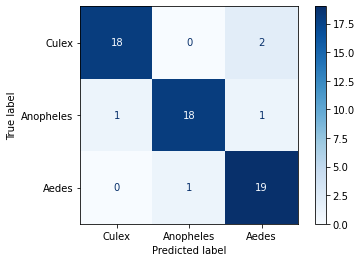

Projected Result: Aedes
Actual Result: Aedes


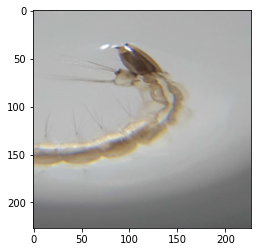

In [ ]:
#Model Analysis

#Graphing
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_pred = model.predict(X_test)
labels = ["Culex", "Anopheles", "Aedes"]

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

#Use model for test value
img = aedes[1700] #Result should be aedes
img = cv2.imread(main_dir + '/Aedes Images' + '/' + img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = Image.fromarray(img, 'RGB')
# resize image to 227x227 which is the required input size of the Alexnet model
img_rs = img_array.resize((227,227))
img = np.array(img_rs)

# convert the image to array
img = np.expand_dims(img, axis=0)
result = model.predict(img)
result = np.argmax(result, axis=1)

if (result == 1):
  print('Projected Result: Culex')

if(result == 2):
  print('Projected Result: Anopheles')

if(result ==  3):
  print('Projected Result: Aedes')
print('Actual Result: Aedes')
#Show an image
plt.imshow(img_rs, cmap=plt.cm.gray_r)


##LeNet-5

In [ ]:
X = []
labels = oLabels
i=0
for img in culex[0:100]:
  img = cv2.imread(main_dir + '/Culex Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((227,227))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)
  
for img in anopheles[0:100]:
  img = cv2.imread(main_dir + '/Anopheles Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((227,227))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)

for img in aedes[0:100]:
  img = cv2.imread(main_dir + '/Aedes Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((227,227))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)

In [ ]:
data = {}
train = {}
test = {}

data['features'] = X
data['labels'] = np.array(labels)
data['features'] = np.array(data['features'])


train['features'], test['features'], train['labels'], test['labels'] = train_test_split(data['features'], data['labels'], test_size=0.2, random_state=0)
X_train, y_train = train['features'], to_categorical(train['labels'])
X_test, y_test = test['features'], to_categorical(test['labels'])

#Make data generators
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=30)
test_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=30)
print('# of training images:', train['features'].shape[0])
print('# of validation images:', test['features'].shape[0])
print(X_train.shape)

# of training images: 240
# of validation images: 60
(240, 227, 227, 3)


In [ ]:
def LeNet():
  model = keras.Sequential()

  model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(227,227,3))) 
  model.add(layers.AveragePooling2D())

  model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
  model.add(layers.AveragePooling2D())

  model.add(layers.Flatten())

  model.add(layers.Dense(units=120, activation='relu'))

  model.add(layers.Dense(units=84, activation='relu'))

  model.add(layers.Dense(units=4, activation = 'softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

  model.summary()
  return model

In [ ]:
model = LeNet()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 225, 225, 6)       168       
                                                                 
 average_pooling2d (AverageP  (None, 112, 112, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_6 (Conv2D)           (None, 110, 110, 16)      880       
                                                                 
 average_pooling2d_1 (Averag  (None, 55, 55, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 48400)             0         
                                                                 
 dense_4 (Dense)             (None, 120)              

In [ ]:
model.fit_generator(train_generator, validation_data=test_generator, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


8/8 [==============================] - 1s 65ms/step - loss: 232.9875 - accuracy: 0.3583 - val_loss: 50.2064 - val_accuracy: 0.4333
Epoch 2/50
8/8 [==============================] - 0s 35ms/step - loss: 28.6930 - accuracy: 0.6417 - val_loss: 2.8781 - val_accuracy: 0.7500
Epoch 3/50
8/8 [==============================] - 0s 34ms/step - loss: 1.9480 - accuracy: 0.8458 - val_loss: 1.7063 - val_accuracy: 0.7833
Epoch 4/50
8/8 [==============================] - 0s 34ms/step - loss: 0.9289 - accuracy: 0.8333 - val_loss: 1.5769 - val_accuracy: 0.8333
Epoch 5/50
8/8 [==============================] - 0s 34ms/step - loss: 0.3005 - accuracy: 0.9208 - val_loss: 1.5472 - val_accuracy: 0.8667
Epoch 6/50
8/8 [==============================] - 0s 36ms/step - loss: 0.1771 - accuracy: 0.9583 - val_loss: 1.6613 - val_accuracy: 0.8500
Epoch 7/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0802 - accuracy: 0.9833 - val_loss: 1.7457 - val_accuracy: 0.8667
Epoch 8/50
8/8 [==================

In [ ]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 22ms/step - loss: 2.1776 - accuracy: 0.8500
Test loss: 2.177598237991333
Test accuracy: 0.8500000238418579


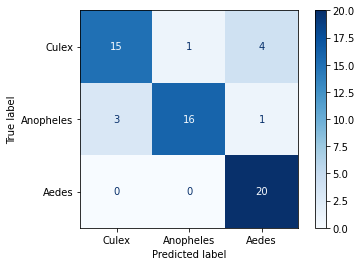

Projected Result: Aedes
Actual Result: Aedes


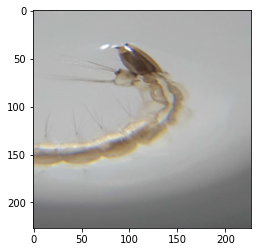

In [ ]:
#Model Analysis

#Graphing
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_pred = model.predict(X_test)
labels = ["Culex", "Anopheles", "Aedes"]

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

#Use model for test value
img = aedes[1700] #Result should be aedes
img = cv2.imread(main_dir + '/Aedes Images' + '/' + img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = Image.fromarray(img, 'RGB')
# resize image to 227x227 which is the required input size of the Alexnet model
img_rs = img_array.resize((227,227))
img = np.array(img_rs)

# convert the image to array
img = np.expand_dims(img, axis=0)
result = model.predict(img)
result = np.argmax(result, axis=1)

if (result == 1):
  print('Projected Result: Culex')

if(result == 2):
  print('Projected Result: Anopheles')

if(result ==  3):
  print('Projected Result: Aedes')
print('Actual Result: Aedes')

#Show an image
plt.imshow(img_rs, cmap=plt.cm.gray_r)

##VGG-16

In [ ]:
#Reshape Data
X = []
labels = oLabels
i=0


i=0
for img in culex[0:100]:
  img = cv2.imread(main_dir + '/Culex Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((224,224))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)

for img in anopheles[0:100]:
  img = cv2.imread(main_dir + '/Anopheles Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((224,224))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)

for img in aedes[0:100]:
  img = cv2.imread(main_dir + '/Aedes Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((224,224))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)

In [ ]:
data = {}
train = {}
test = {}

data['features'] = X
data['labels'] = np.array(labels)
data['features'] = np.array(data['features'])


train['features'], test['features'], train['labels'], test['labels'] = train_test_split(data['features'], data['labels'], test_size=0.2, random_state=0)
X_train, y_train = train['features'], to_categorical(train['labels'])
X_test, y_test = test['features'], to_categorical(test['labels'])

#Make data generators
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=30)
test_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=30)
print('# of training images:', train['features'].shape[0])
print('# of validation images:', test['features'].shape[0])
print(X_train.shape)

# of training images: 240
# of validation images: 60
(240, 224, 224, 3)


In [ ]:
def VGG16():
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4, activation="softmax"))

  from tensorflow.keras.optimizers import Adam
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  return model

In [ ]:
model = VGG16()

In [ ]:
history = model.fit_generator(train_generator, validation_data=test_generator, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


8/8 [==============================] - 5s 288ms/step - loss: 995.5944 - accuracy: 0.3042 - val_loss: 1.1190 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 2s 247ms/step - loss: 1.1624 - accuracy: 0.2875 - val_loss: 1.1319 - val_accuracy: 0.3833
Epoch 3/50
8/8 [==============================] - 2s 247ms/step - loss: 1.0642 - accuracy: 0.3875 - val_loss: 0.9572 - val_accuracy: 0.5167
Epoch 4/50
8/8 [==============================] - 2s 249ms/step - loss: 0.9299 - accuracy: 0.5917 - val_loss: 0.9300 - val_accuracy: 0.5500
Epoch 5/50
8/8 [==============================] - 2s 248ms/step - loss: 0.8565 - accuracy: 0.5875 - val_loss: 0.8369 - val_accuracy: 0.5667
Epoch 6/50
8/8 [==============================] - 2s 248ms/step - loss: 0.8056 - accuracy: 0.6000 - val_loss: 0.9631 - val_accuracy: 0.4833
Epoch 7/50
8/8 [==============================] - 2s 248ms/step - loss: 0.7875 - accuracy: 0.5708 - val_loss: 0.7298 - val_accuracy: 0.6167
Epoch 8/50
8/8 [=============

In [ ]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 81ms/step - loss: 0.6167 - accuracy: 0.8333
Test loss: 0.6166850328445435
Test accuracy: 0.8333333134651184


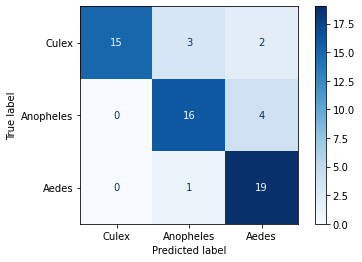

Projected Result: Aedes
Actual Result: Aedes


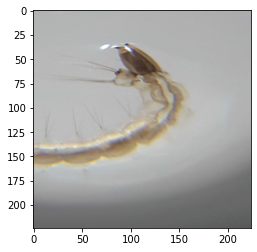

In [ ]:
#Model Analysis

#Graphing
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_pred = model.predict(X_test)
labels = ["Culex", "Anopheles", "Aedes"]

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

#Use model for test value
img = aedes[1700] #Result should be aedes
img = cv2.imread(main_dir + '/Aedes Images' + '/' + img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = Image.fromarray(img, 'RGB')
# resize image to 227x227 which is the required input size of the Alexnet model
img_rs = img_array.resize((224,224))
img = np.array(img_rs)

# convert the image to array
img = np.expand_dims(img, axis=0)
result = model.predict(img)
result = np.argmax(result, axis=1)

if (result == 1):
  print('Projected Result: Culex')

if(result == 2):
  print('Projected Result: Anopheles')

if(result ==  3):
  print('Projected Result: Aedes')
print('Actual Result: Aedes')

#Show an image
plt.imshow(img_rs, cmap=plt.cm.gray_r)

##ResNet-50

In [ ]:
#Reshape Data
X = []
labels = oLabels
i=0


i=0
for img in culex[0:100]:
  img = cv2.imread(main_dir + '/Culex Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((32,32))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)

for img in anopheles[0:100]:
  img = cv2.imread(main_dir + '/Anopheles Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((32,32))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)

for img in aedes[0:100]:
  img = cv2.imread(main_dir + '/Aedes Images' + '/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array = Image.fromarray(img, 'RGB')
  # resize image to 227x227 which is the required input size of the Alexnet model
  img_rs = img_array.resize((32,32))
  # convert the image to array
  img_rs = np.array(img_rs)
  X.append(img_rs)

In [ ]:
data = {}
train = {}
test = {}

data['features'] = X
data['labels'] = np.array(labels)
data['features'] = np.array(data['features'])


train['features'], test['features'], train['labels'], test['labels'] = train_test_split(data['features'], data['labels'], test_size=0.2, random_state=0)
X_train, y_train = train['features'], to_categorical(train['labels'])
X_test, y_test = test['features'], to_categorical(test['labels'])

#Make data generators
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=30)
test_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=30)
print('# of training images:', train['features'].shape[0])
print('# of validation images:', test['features'].shape[0])
print(X_train.shape)

# of training images: 240
# of validation images: 60
(240, 32, 32, 3)


In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X


def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def ResNet50(input_shape=(32, 32, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model




In [ ]:
base_model = ResNet50(input_shape=(32, 32, 3))

headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(4,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
model.compile(optimizer='SGD', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
H = model.fit_generator(train_generator,validation_data=test_generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


8/8 [==============================] - 7s 213ms/step - loss: 1.3738 - accuracy: 0.4250 - val_loss: 3.7732 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 0s 48ms/step - loss: 0.9298 - accuracy: 0.6625 - val_loss: 1.2992 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 0s 46ms/step - loss: 0.7397 - accuracy: 0.7167 - val_loss: 1.3013 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 0s 47ms/step - loss: 0.8565 - accuracy: 0.6542 - val_loss: 1.2728 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 0s 46ms/step - loss: 0.6515 - accuracy: 0.7583 - val_loss: 1.1828 - val_accuracy: 0.3500
Epoch 6/50
8/8 [==============================] - 0s 47ms/step - loss: 0.4194 - accuracy: 0.8542 - val_loss: 1.2142 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 0s 46ms/step - loss: 0.3563 - accuracy: 0.8500 - val_loss: 1.2216 - val_accuracy: 0.4167
Epoch 8/50
8/8 [=====================

In [ ]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 17ms/step - loss: 0.2703 - accuracy: 0.8667
Test loss: 0.2702973783016205
Test accuracy: 0.8666666746139526


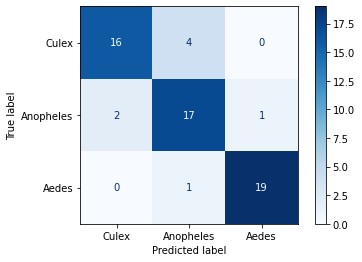

Projected Result: Aedes
Actual Result: Aedes


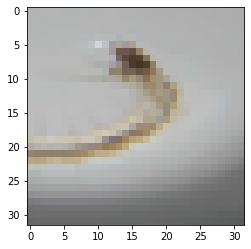

In [ ]:
#Model Analysis

#Graphing
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_pred = model.predict(X_test)
labels = ["Culex", "Anopheles", "Aedes"]

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

#Use model for test value
img = aedes[1700] #Result should be aedes
img = cv2.imread(main_dir + '/Aedes Images' + '/' + img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = Image.fromarray(img, 'RGB')
# resize image to 227x227 which is the required input size of the Alexnet model
img_rs = img_array.resize((32,32))
img = np.array(img_rs)

# convert the image to array
img = np.expand_dims(img, axis=0)
result = model.predict(img)
result = np.argmax(result, axis=1)

if (result == 1):
  print('Projected Result: Culex')

if(result == 2):
  print('Projected Result: Anopheles')

if(result ==  3):
  print('Projected Result: Aedes')
print('Actual Result: Aedes')

#Show an image
plt.imshow(img_rs, cmap=plt.cm.gray_r)